# Estimation and Inference

## Acknowledgment 

Some of the content here is based on [Computational and Inferential Thinking: The Foundations of Data Science](https://inferentialthinking.com/chapters/intro.html), by A. Adhikari, J. DeNero, D. Wagner.

On the other hand, this text uses its own module `datascience` for data frame manipulations, while we will use pandas, which is the most commonly used library for data frames in Python.

## Importing Modules

Let's start by importing the necessary modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 6)  # default figure size
plt.style.use("ggplot")  # style sheet

## Introduction

Election polls cannot quite ask the whole voting population for their intended candidates.  It relies on a very small sample to make predictions, which are [often quite accurate](https://fivethirtyeight.com/features/2022-election-polling-accuracy/).

Here we will illustrate how often a relatively small samples can yield accurate estimates for properties of the entire data.

## Sampling

The key fact here is that if the sample is *random enough* and *not too small*, in relative terms, the sample "looks like" the entire data.

## Flight Delay

As an illustration, we will use the file [united_summer2015.csv](united_summer2015.csv) (provided with this notebook) to see how a sample can give information about the entire data. 

The file contains data for United Airlines domestic flights departing from San Francisco in the summer of 2015. The data are made publicly available by the [Bureau of Transportation Statistics](http://www.transtats.bts.gov/Fields.asp?Table_ID=293) in the United States Department of Transportation.

There are 13,825 rows, each corresponding to a flight. The columns are the date of the flight, the flight number, the destination airport code, and the departure delay time in minutes. Some delay times are negative: those flights left early.

In [2]:
united = pd.read_csv("united_summer2015.csv")
united

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


### Full Data Mean and Distribution

Let's find the average delay:

In [3]:
data_mean = united["Delay"].mean()
data_mean

16.658155515370705

Let's look at the distribution of the delays in a (density) histogram:

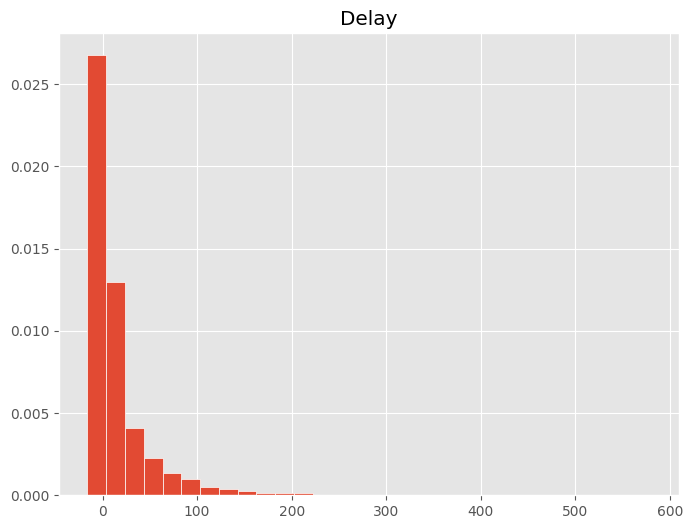

In [4]:
united.hist("Delay", bins=30, density=True, ec="white");

It seems we have a very small proportion of flights with very high delay:

In [5]:
high_delay = 200
len(united.query("Delay >= @high_delay")) / len(united)

0.008535262206148283

So, less than 1% of flights have a delay of 200 minutes or more.

Maybe we can then better visualize the more relevant part of the data by restricting the data:

In [6]:
united["Delay"].min()

-16

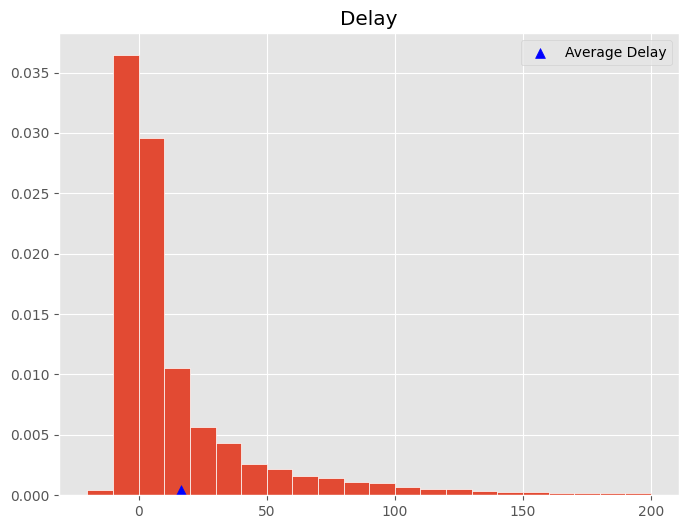

In [7]:
delay_bins = np.arange(-20, high_delay + 10, 10)

# histogram
united.query("Delay <= @high_delay").hist(
    "Delay", bins=delay_bins, density=True, ec="white"
)

# average delay
plt.scatter(data_mean, 0, marker="^", c="blue", s=200, label="Average Delay")

plt.legend(markerscale=0.5);

### Sample

Let's now take a *random* samples of the data.

To make our tests easier, let's write a function that allows to choose a sample size, and gives us the sample, while also displaying its average and distribution of delays.

In [8]:
def test_sample(sample_size):
    """
    Takes a sample of the united data frame of given size, displays the average delay from the sample
    and its histogram, and returns the sample.
    
    INPUT:
    sample_size: size of the sample to be taken from the united data frame.
    
    OUTPUTS:
    prints average delay from the sample (of given size);
    displays the density histogram for the delays of the sample;
    *returns* the sample.
    """
    sample = united.sample(sample_size)
    mean = sample["Delay"].mean()
    print(f"The average delay for this sample (of size {sample_size}) is {mean}.")
    
    sample.hist("Delay", bins=delay_bins, density=True, ec="white")
    plt.scatter(mean, 0, marker="^", c="blue", s=200)
    
    return sample

As one would expect, small samples can differ considerably from the full data.

The average delay for this sample (of size 10) is 3.5.


,Date,Flight Number,Destination,Delay
651,6/5/15,718,IAH,-2
4342,6/29/15,1922,EWR,4
289,6/2/15,1753,MCO,-1
6020,7/11/15,663,HNL,0
3531,6/24/15,1132,DFW,31
5463,7/7/15,1725,OGG,8
4631,7/1/15,1753,MCO,-6
11074,8/13/15,427,OGG,-8
1058,6/8/15,444,BOS,-10
11714,8/17/15,710,DEN,19


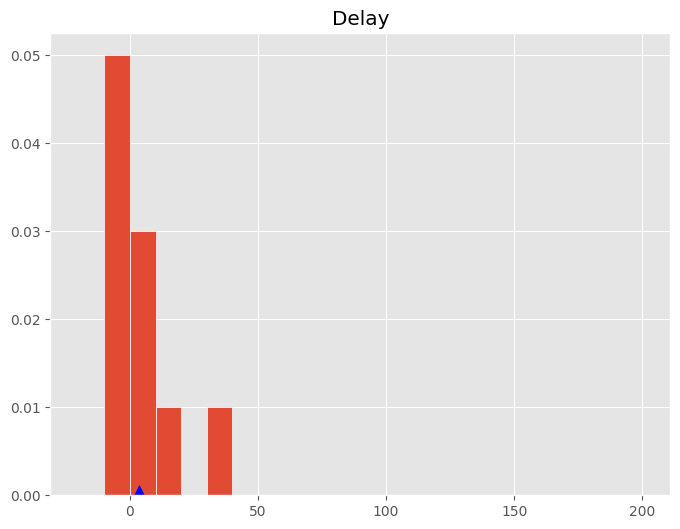

In [9]:
test_sample(10)

But it gets better with larger samples:

The average delay for this sample (of size 50) is 14.36.


,Date,Flight Number,Destination,Delay
7381,7/20/15,1073,BOS,-5
11882,8/18/15,1122,SEA,4
13543,8/30/15,300,HNL,0
1893,6/13/15,1415,IAH,12
11649,8/16/15,1947,BWI,5
7554,7/21/15,1168,EWR,2
8406,7/27/15,325,BOS,-5
2172,6/15/15,1199,SEA,43
4162,6/28/15,1608,EWR,-2
10888,8/11/15,1993,IAD,24


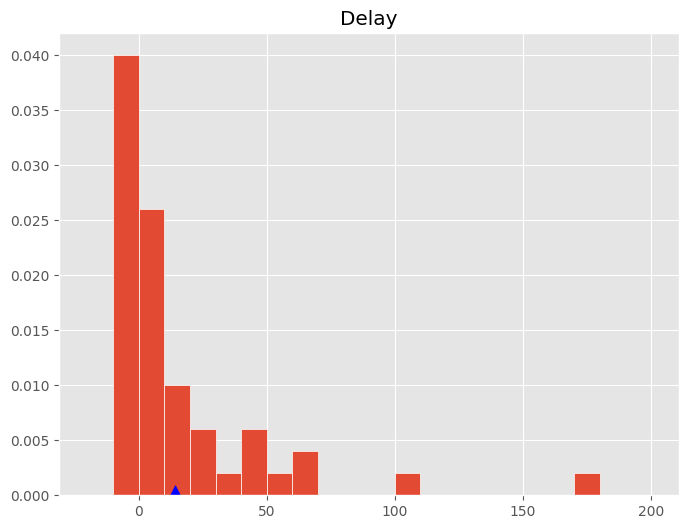

In [10]:
test_sample(50)

The average delay for this sample (of size 100) is 16.25.


,Date,Flight Number,Destination,Delay
4717,7/2/15,1020,LAS,3
6168,7/12/15,1109,DEN,4
13553,8/30/15,468,LAX,-4
11899,8/18/15,1405,RNO,81
11305,8/14/15,1211,ORD,0
...,...,...,...,...
3708,6/25/15,1521,SEA,23
3715,6/25/15,1581,OGG,19
13143,8/27/15,574,ORD,-4
9569,8/3/15,1526,SEA,14


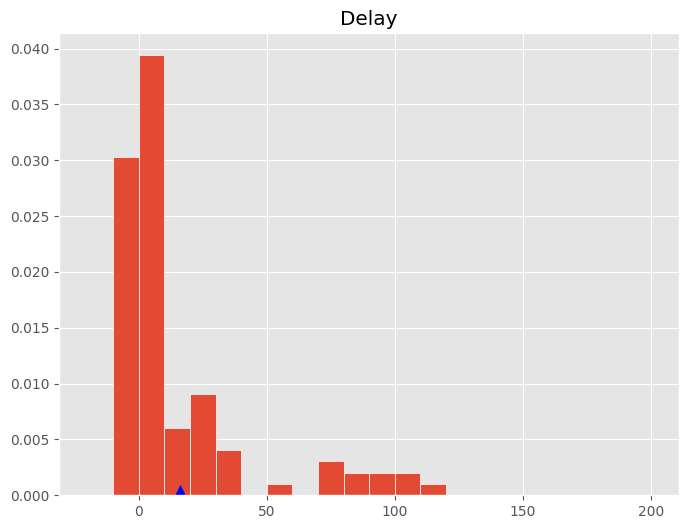

In [11]:
test_sample(100)

The average delay for this sample (of size 1000) is 18.311.


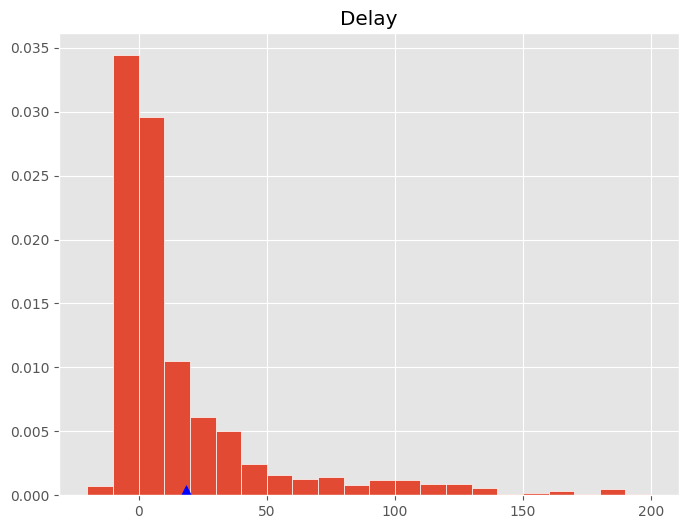

In [12]:
flight_sample = test_sample(1000)

Let's visualize how the average behaves with sample sizes:

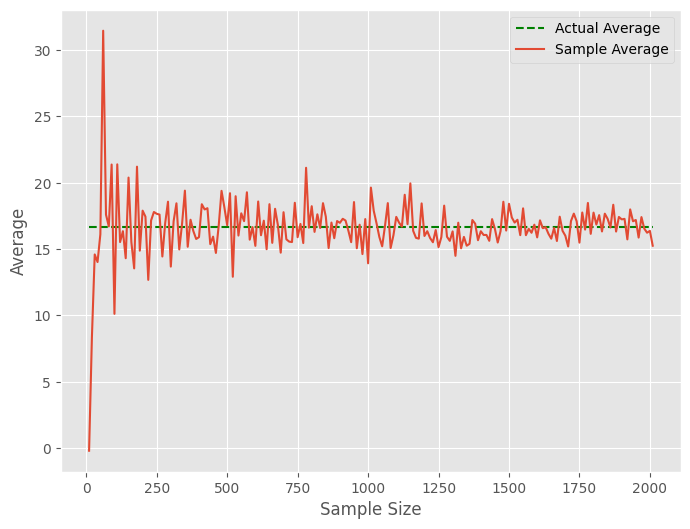

In [13]:
def sample_mean(sample_size):
    """
    Takes a sample of the united data frame of the given size and returns its mean.
    
    INPUT:
    sample_size: size of the sample to be taken from the united data frame;
    
    OUTPUT:
    average delay from the sample.
    """
    sample = united.sample(sample_size)
    return sample["Delay"].mean()

# sample sizes to try
sample_sizes = np.arange(10, 2011, 10)

# averages for each sample size
means = np.array([sample_mean(size) for size in sample_sizes])

# plot horizontal line with actual average
plt.plot(
    [sample_sizes[0], sample_sizes[-1]],
    [data_mean, data_mean],
    c="green",
    linestyle="dashed",
    label="Actual Average"
)

# plot the averages for the sample sizes
plt.plot(sample_sizes, means, label="Sample Average")

plt.xlabel("Sample Size")
plt.ylabel("Average")

plt.legend();

(Note, each time you run the cell above you get a different plot, but all with similar features.)

We can see then that our estimate for the average delay of the flights is not too far off from the real, especially for larger sample sizes.  So, one can estimate that it is about:

In [14]:
sample_mean(1000)

16.143

The real one was:

In [15]:
data_mean

16.658155515370705

### Variation

Each time we take a sample, even if they all have the same size, we get a different value.

Again, let's visualize this:

Minimum Sample Average: 14.073
Maximum Sample Average: 19.710
Actual Average:         16.658




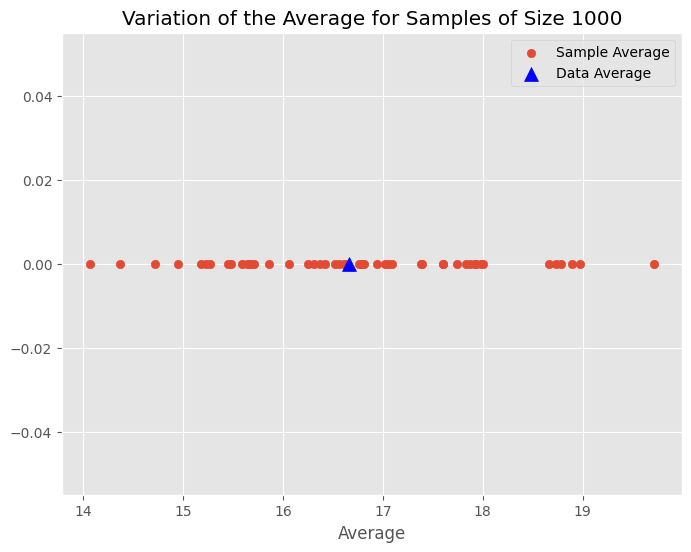

In [16]:
sample_size = 1000  # fixed sample size
number_of_samples = 50  # how many samples of given size

# array with averages
averages = np.array([sample_mean(sample_size) for _ in range(number_of_samples)])

# zeros for the scatter plot
zeros = np.zeros(number_of_samples)

# range of averages
min_mean = np.min(averages)
max_mean = np.max(averages)

# display the averages
plt.scatter(averages, zeros, label="Sample Average")

# actual average
plt.scatter(data_mean, 0, c="blue", marker="^", s=100, label="Data Average")

plt.title(f"Variation of the Average for Samples of Size {sample_size}")
plt.xlabel("Average")

plt.legend()

print(f"Minimum Sample Average: {min_mean:.3f}")
print(f"Maximum Sample Average: {max_mean:.3f}")
print(f"Actual Average:         {data_mean:.3f}\n\n");

Or, to see the distribution of the found averages:

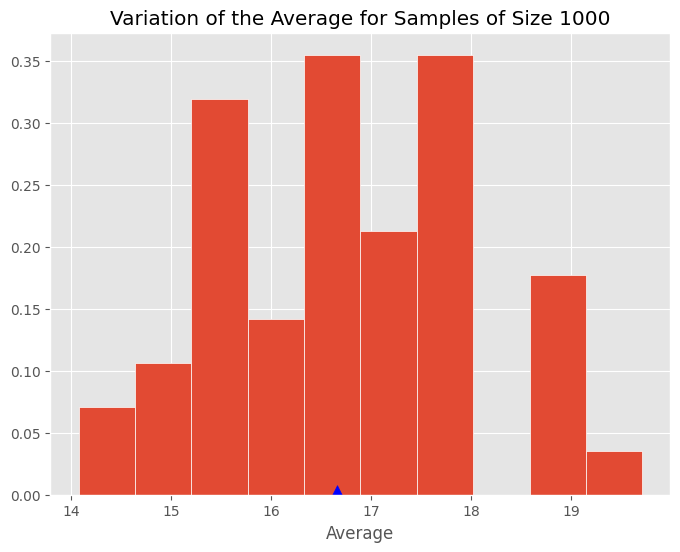

In [17]:
# histogram
plt.hist(averages, ec="white", density=True)

# actual average
plt.scatter(data_mean, 0, c="blue", marker="^", s=200, label="Average")

plt.title(f"Variation of the Average for Samples of Size {sample_size}")
plt.xlabel("Average");

Thus, it seems that taking a single sample and using it to obtain an estimate for the full data is dangerous, as we might, due to luck and the randomness of the process, get a "bad" sample.  

And even if it not bad (which is hard to know), what sort of variation should we expect, in other words, how far off could it be from the actual average?

Ideally, we should take many samples of the full data, and then use *all* the obtained averages to get a better idea about what the actual average is.  Unfortunately, most of the time this is impossible, as sampling in real life demands a lot of funds, time, and effort.

Fortunately, there is something we can do without getting a new samples from the whole population!

## The Bootstrap

If our original (and only sample) is large enough and random enough, it will resemble the original data.  So, the idea is:

**Since the sample is similar to the population, we take a new sample *from the (original) sample itself*!**  This is what we call *bootstrapping*.

This will give us a new sample that, in principle, should look similar to an actual sample from the population!

When "resampling", we will preserve the sample size, and thus we obviously need to do the resampling **with replacement** (i.e., allowing repeated rows), as otherwise we would only permute the original sample and simply obtain the same data with different ordering only.  

Note that replacing the data makes sense, since the probability curves of the sample and original data (or their value distributions) should be similar.

Let's see this process in practice!  We start with a single sample:

In [18]:
flight_sample = united.sample(1000)

Now, we will *resample* this sample (and *not the full data*), **with repetition**, *many* times over!  (*Thousands* of times!) For each one, we record the obtained average.  

Note that the resampling is done with

```python
flight_sample.sample(frac=1, replace=True)
```

The `frac=1` makes it so the sample has the same size as the original `flight_sample` data frame, and `replace=True`, makes it so that repeated rows is allowed.

Let's write a function that gets the mean of one resample:

In [19]:
def resample_mean():
    """
    Gives the average of one resampling of fligt_sample.
    
    INPUT:
    None.
    
    OUTPUT:
    Average of one resampling.
    """
    resample = flight_sample.sample(frac=1, replace=True)
    return resample["Delay"].mean()

We will store the obtained averages in the array `means`:

In [20]:
number_of_repetions = 20_000

# array with number_of_repetitions averages from resampling
means = np.array([resample_mean() for _ in range(number_of_repetions)])

Note we use [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions).  The code above is equivalent to:

```python
means_list = []

for _ in range(number_of_repetitions):
    means_list.append(resample_mean())
    
means = np.array(means_list)
```

Now, let's look at the distribution of averages in the resamples:

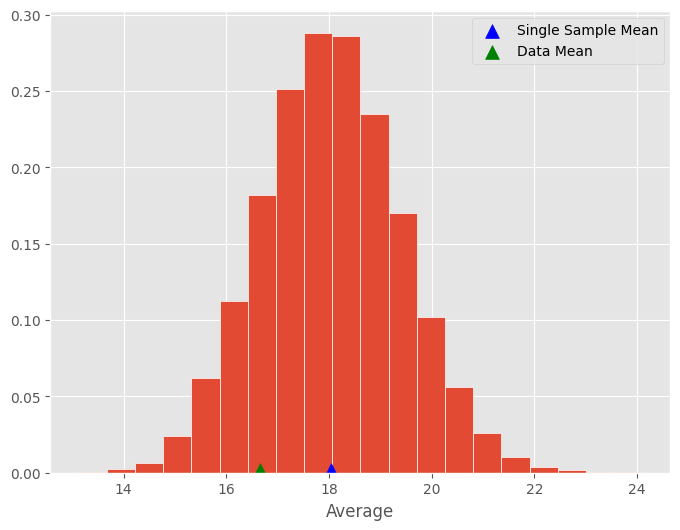

In [21]:
# distribution of means
plt.hist(means, ec="white", density=True, bins=20)

# the original average from the original sample
plt.scatter(
    flight_sample["Delay"].mean(),
    0,
    marker="^",
    s=200,
    c="blue",
    label="Single Sample Mean",
)

# actual average
plt.scatter(
    data_mean,
    0,
    marker="^",
    s=200,
    c="green",
    label="Data Mean",
)

plt.xlabel("Average")

plt.legend(markerscale=0.7);

As one would expect, the sample's (used for the resampling) average is (relatively) near the center of the distribution of averages if the resampling, but the actual mean is not too far off.

## Confidence Interval

We know that our real average should not be too far off from our sample average, and our resamples give us an idea of the possible variations introducing by the randomness of the sampling process.

So, assuming we did not know the original average, but only our sample (and thus also its resamples), we can give an *interval* within which we can expect, with a certain degree of certainty, the actual average to be.

For a certain percentage $P$, the *$P\%$ confidence interval* is the *middle interval* among the bootstrapped means that contains $P\%$ of the means.  In other words, its boundaries leave half of  $(100 - P)\%$ to its left, and half of $(100 - P)\%$ to its right.

*Roughly speaking*, we are (about) $P\%$ confident that our actual average falls in this interval.  (The truth is that we are about $P\%$ sure that the *sample average* lies in that interval.)  But, in any event, the higher the percentage $P$ is, the more likely it is that our interval contains the real mean.

So, let's compute the $90\%$ confidence interval for our data.  We use `np.percentile` to find its boundaries:

In [22]:
percentage = 90

# boundaries
left_bd = np.percentile(means, (100 - percentage) / 2)
right_bd = np.percentile(means, percentage + (100 - percentage) / 2)

print(f"The {90}% confidence interval goes from {left_bd} to {right_bd}.")

The 90% confidence interval goes from 15.838 to 20.30605.


As usual let's visualize it:

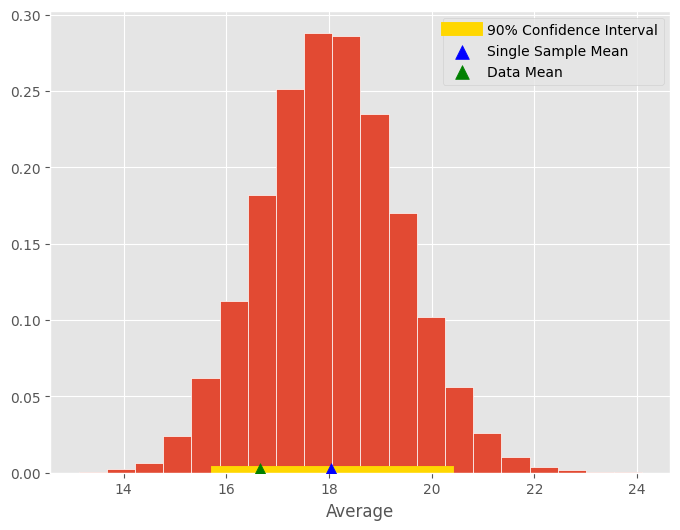

In [23]:
# distribution of averages
# zorder is used to choose which plot goes on top of which, with higher on top
plt.hist(means, ec="white", density=True, bins=20, zorder=1)

# plot the confidence interval
plt.plot(
    [left_bd, right_bd],
    [0, 0],
    c="gold",
    linewidth=10,
    label=f"{percentage}% Confidence Interval",
    zorder=2,
)

# average from the sample
plt.scatter(
    flight_sample["Delay"].mean(),
    0,
    marker="^",
    s=200,
    c="blue",
    label="Single Sample Mean",
    zorder=3,
)

# actual average
plt.scatter(
    data_mean,
    0,
    marker="^",
    s=200,
    c="green",
    label="Data Mean",
    zorder=3,
)

plt.xlabel("Average")

plt.legend(markerscale=0.7);

(Change the value of `percentage` above, and rerun the previous two code cells, to see the results for different percentages.)

## Note on Accuracy

The bootstrap is a powerful and useful method, but it relies on the original sample being close to the original.  So, to be reliable, the original sample has to be large enough and must be drawn randomly.

## Median Birth Weight

Let's now examine some data for which we do not have the full data.

The file [baby.csv](baby.csv) (provided with this notebook) contains the following variables for 1,174 mother-baby pairs:

- birth weight in ounces, 
- the number of gestational days, 
- the mother's age, 
- the mother's height in inches, 
- pregnancy weight in pounds, 
- and whether or not the mother smoked during pregnancy.

In [24]:
births = pd.read_csv("baby.csv")
births

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


Obviously, this is only a sample of the birth weights.  What we would like to do here is to estimate the median of the birth weights *for all babies* of similar background.

### What is the "Entire Population"?

We want to use the sample to estimate the median for the "entire population", but what is the entire population in this case?

Again our methods only work if the sample is representative of the "entire population".  Thus, we have to remember that our estimates only work for babies that come from similar backgrounds.

Some of the aspects that they probably should have in common are:

* regions where their mother live (as they were taken from a hospital system, but not from all hospitals), like country, state, city, county, etc.;
* babies that are born in hospitals.

Note that the first point is associated to many other aspects, such as culture, access to health care, education levels, etc.

### Why the Median?

The statistic we chose here was the *median*, i.e., the weight that has half of the newborns heavier (or of same weight) and half lighter (or of same weight).  Unlike the average, the median is less affected by outliers, especially when dealing (relatively) small samples.

### Bootstrap

Here we are only interested on the birth weights, so let's only take the array of birth weights and compute its median:

In [25]:
# *array* of birth weights
sample_weights = births["Birth Weight"].to_numpy()
sample_median = np.median(sample_weights)

sample_median

120.0

Now, we do the resampling.  In this case we will use NumPy (instead of pandas), since we have our data in an array.  (Using arrays and NumPy is a bit faster than data frames and pandas, but both work well.)

With NumPy we use `np.random.choice`, as in

```python
np.random.choice(sample_weights, len(sample_weights))
```

Note that *it allows repetitions by default*, so no extra argument (besides the size) has to be passed.

Let's then write a function that takes a sample and computes the median:

In [26]:
def resample_median():
    """
    Resample the the sample_weights array, with same size and allowing repetitions.
    
    INPUT:
    None.
    
    OUTPUT:
    One resample of sample_weights.
    """
    resample = np.random.choice(sample_weights, len(sample_weights))
    return np.median(resample)

Now we can do the resampling and collect the medians:

In [27]:
%%time
number_of_repetions = 30_000

# array of medias for number_of_repetitions resamples
medians = np.array([resample_median() for _ in range(number_of_repetions)])

CPU times: user 2.1 s, sys: 2.06 ms, total: 2.1 s
Wall time: 2.12 s


#### Technical Digression: Leveraging the Power of NumPy

The code above is already quite fast, but we can do a better by using NumPy (and avoiding the list comprehension).  We can pass `np.random.choice` a tuple, with number of rows and columns.  

So, passing `(number_of_repetions, len(sample_weights)`, we produce a two-dimensional array that have our resamples in the rows and `number_of_repetition` rows.  Then, we can take the median of the rows by passing the optional argument `axis=1` to `np.median`:

In [28]:
%%time
number_of_repetions = 30_000
np.median(
    np.random.choice(sample_weights, (number_of_repetions, len(sample_weights))), 
    axis=1  # median of rows!
)

CPU times: user 858 ms, sys: 665 ms, total: 1.52 s
Wall time: 1.53 s


array([120., 120., 120., ..., 120., 119., 119.])

(Note that the function `resample_median` is not needed.)

In my experiments, this new version runs in about half the time.  In this case, the slower way is already so fast that it might not be worth implementing the second method, espcially since the first is probably easier to read (and write).  (*Readability counts!*)  

But if your code is slow, it is worth considering using NumPy more directly in the computations.

### Results

Let's now compute the $90\%$ confidence interval:

In [29]:
percentage = 90

# boundaries of the confidence interval
left_bd = np.percentile(medians, (100 - percentage) / 2)
right_bd = np.percentile(medians, percentage + (100 - percentage) / 2)

print(f"The {90}% confidence interval goes from {left_bd} to {right_bd}.")

The 90% confidence interval goes from 119.0 to 121.0.


As usual let's visualize it:

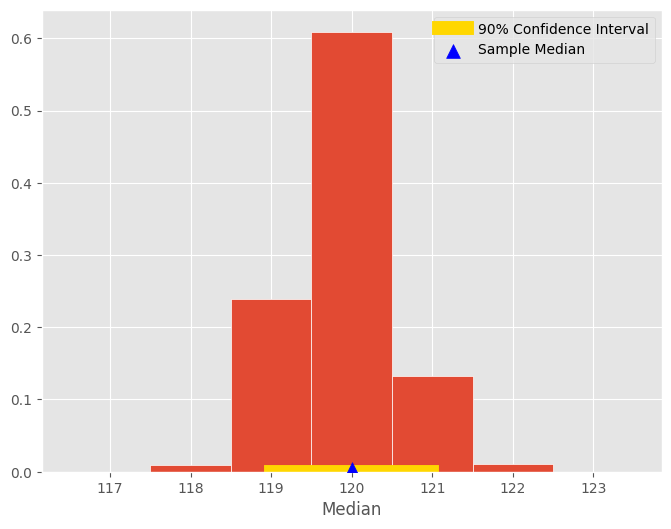

In [30]:
# bins to separate the medians
# it contains all integers from the minimum to the maximum in the *center*
median_bins = np.arange(np.min(medians) - 0.5, np.max(medians) + 1.5, 1)

# distribution of medians
plt.hist(medians, ec="white", density=True, bins=median_bins, zorder=1)

# confidence interval
plt.plot(
    [left_bd, right_bd],
    [0, 0],
    c="gold",
    linewidth=10,
    label=f"{percentage}% Confidence Interval",
    zorder=2,
)

# sample median
plt.scatter(
    sample_median,
    0,
    marker="^",
    s=200,
    c="blue",
    label="Sample Median",
    zorder=3,
)

plt.xlabel("Median")

plt.legend(markerscale=0.7);

## Confidence Interval for Testing a Hypothesis

We can also use confidence intervals to test a hypothesis.  We illustrate this method with an example:

### Comparing Baseline and Post-Treatment Scores

Here we have a subset of the information gathered in a randomized controlled trial about treatments for Hodgkin's disease.  Although the disease is curable, the treatment can be very harsh. The purpose of the trial was to come up with dosage that would cure the cancer but minimize the adverse effects on the patients. 

The file [hodgkins.csv](hodgkins.csv) (provided with this notebook) contains data on the effect that the treatment had on the lungs of 22 patients. The columns are:

- Height in cm.
- A measure of radiation to the mantle (neck, chest, under arms).
- A measure of chemotherapy.
- A score of the health of the lungs at baseline, that is, at the start of the treatment; higher scores correspond to more healthy lungs.
- The same score of the health of the lungs, 15 months after treatment.

In [31]:
hodgkins = pd.read_csv("hodgkins.csv")

hodgkins

,height,rad,chemo,base,month15
0,164,679,180,160.57,87.77
1,168,311,180,98.24,67.62
2,173,388,239,129.04,133.33
3,157,370,168,85.41,81.28
4,160,468,151,67.94,79.26
5,170,341,96,150.51,80.97
6,163,453,134,129.88,69.24
7,175,529,264,87.45,56.48
8,185,392,240,149.84,106.99
9,178,479,216,92.24,73.43


We will compare the baseline and 15-month scores.

At a glance, you can see that the patients are doing worse after 15-months.  Let's add a column `drop` to see that more clearly.

In [32]:
drop = (hodgkins["base"] - hodgkins["month15"]).to_numpy()

drop

array([ 72.8 ,  30.62,  -4.29,   4.13, -11.32,  69.54,  60.64,  30.97,
        42.85,  18.81,  15.82,  38.97,  21.21,  13.63,  42.78,  28.06,
        23.43,   1.89,  43.04,  33.9 ,  27.84,  24.23])

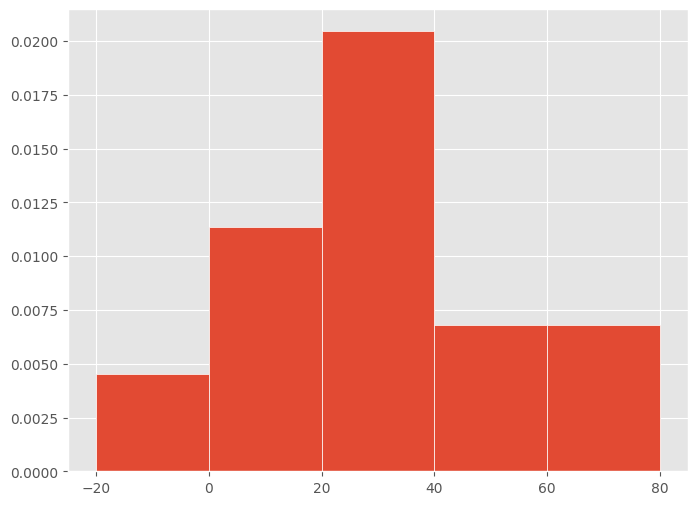

In [33]:
plt.hist(drop, density=True, ec="white", bins=np.arange(-20, 81, 20));

Let's see the average drop:

In [34]:
average_drop = np.mean(drop)

average_drop

28.615909090909096

In the sample, the average drop is about 28.6. But could this be the result of chance variation? The data are from a random sample. Could it be that in the entire population of patients, the average drop is just 0?

Thus, here we have:

* **Null hypothesis:** In the population, the average drop is 0.
* **Alternative hypothesis:** In the population, the average drop is not 0.

Since here we cannot generate data that simulate the trial, we use the bootstrap (or resampling) for the simulation!  Since we are drawing from the same data, its general properties (including the distribution of values) should be quite similar to the original.

To test this hypothesis with a 1% cutoff for the $p$-value, let's construct an approximate $99\%$ confidence interval for the average drop in the population.

We first write the function that computes the average of one sample:

In [35]:
def resample_mean():
    """
    Computes the average from a single resample of drop,
    
    INPUT:
    None.
    
    OUTPUT:
    Average of the resample.
    """
    resample = np.random.choice(drop, len(drop))
    return np.mean(resample)

Then we do the bootstrap:

In [36]:
# Generate 10,000 bootstrap means
number_of_repetions = 10_000

# array of averages
means = [resample_mean() for _ in range(number_of_repetions)]

Let's find the boundaries for the $99\%$ confidence interval:

In [37]:
percentage = 99

# boundaries for the confidence interval
left_bd = np.percentile(means, (100 - percentage) / 2)
right_bd = np.percentile(means, percentage + (100 - percentage) / 2)

print(f"The {90}% confidence interval goes from {left_bd} to {right_bd}.")

The 90% confidence interval goes from 17.07242727272727 to 40.196920454545435.


And finally, let's visualize the results:

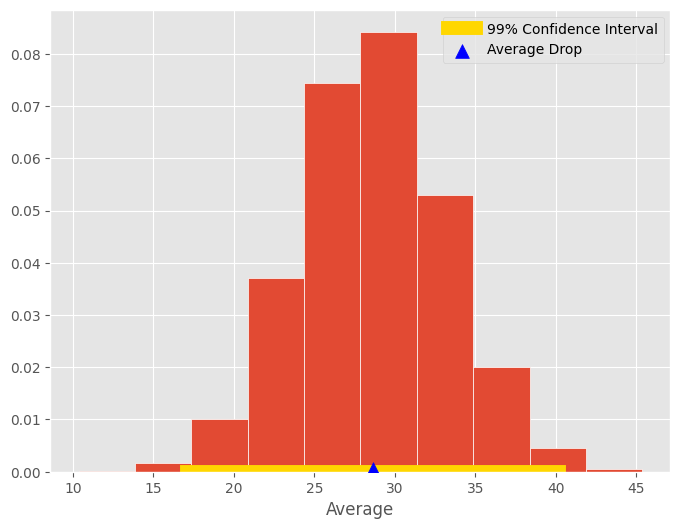

In [38]:
# histogram for averages
plt.hist(means, ec="white", density=True, zorder=1)

# confidence interval
plt.plot(
    [left_bd, right_bd],
    [0, 0],
    c="gold",
    linewidth=10,
    label=f"{percentage}% Confidence Interval",
    zorder=2,
)

# observed average
plt.scatter(
    average_drop,
    0,
    marker="^",
    s=200,
    c="blue",
    label="Average Drop",
    zorder=3,
)

plt.xlabel("Average")

plt.legend(markerscale=0.7);

The 99% confidence interval for the average drop in the population goes from about 17 to about 40. The interval doesn't contain 0. So we reject the null hypothesis.

But notice that we have done better than simply concluding that the average drop in the population isn't 0. We have estimated how big the average drop is. That's a more useful result than just saying, "It's not 0."  In fact, it indicates that is higher than zero, and quite probably between 17 and 40.

**A note on accuracy:** Our confidence interval is quite wide, for two main reasons:
- The confidence level is high (99%).
- The sample size is relatively small compared to those in our earlier examples.


## Comments, Suggestions, Corrections

Please send your comments, suggestions, and corrections to lfinotti@utk.edu.